In [1]:
import pandas as pd 
import numpy as np 

Creating nodes and elements

In [2]:
columns = ['start','end','area','length','E']
data = [[0,1,1,30,30000000],[1,2,1,30,30000000],[2,3,2,30,15000000]]
elements = pd.DataFrame(data=data,columns=columns)

columns = ['coordinate','displacement','load']
data = [[0,0,np.nan],[30,np.nan,3000],[60,np.nan,0],[90,0,np.nan]]
nodes = pd.DataFrame(data=data,columns=columns)
print(elements)
print('---------------------------------------------')
print(nodes)

   start  end  area  length         E
0      0    1     1      30  30000000
1      1    2     1      30  30000000
2      2    3     2      30  15000000
---------------------------------------------
   coordinate  displacement    load
0           0           0.0     NaN
1          30           NaN  3000.0
2          60           NaN     0.0
3          90           0.0     NaN


Global stiffness matrix

In [3]:
n = len(nodes)
K = np.zeros([n,n])
for i in range(n-1):
    e = elements.loc[i]
    start = e['start']
    end = e['end']
    stiffness = e['area']*e['E']/e['length']
    k = np.zeros([n,n])
    idx = np.ix_([start,end],[start,end])
    k[idx] = stiffness*np.array([[1,-1],[-1,1]])
    K = np.add(K,k)
print(K)

[[ 1000000. -1000000.        0.        0.]
 [-1000000.  2000000. -1000000.        0.]
 [       0. -1000000.  2000000. -1000000.]
 [       0.        0. -1000000.  1000000.]]


Solving element equations

In [4]:
A = nodes['displacement'].isna()
B = nodes['load'].isna()

KAA = K[np.ix_(A,A)]
KAB = K[np.ix_(A,B)]
KBA = K[np.ix_(B,A)]
KBB = K[np.ix_(B,B)]

In [5]:
U = nodes['displacement']
Uk = U[B]

P= nodes['load']
Pk = P[A]

Uuk = np.dot(np.linalg.inv(KAA),(Pk - np.dot(KAB,Uk)))
Puk = np.dot(KBA,Uuk) + np.dot(KBB,Uk)

In [6]:
results = nodes.copy()
results.loc[A,'displacement'] = Uuk
results.loc[B,'load'] = Puk
print("Nodal forces:")
print(results.load)
print('----------------------')
print("Nodal displacements:")
print(results.displacement)

Nodal forces:
0   -2000.0
1    3000.0
2       0.0
3   -1000.0
Name: load, dtype: float64
----------------------
Nodal displacements:
0    0.000
1    0.002
2    0.001
3    0.000
Name: displacement, dtype: float64


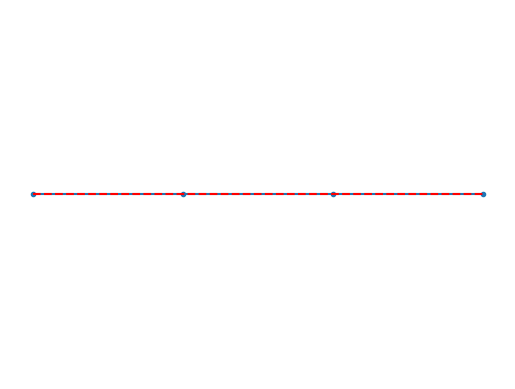

array([[0.],
       [0.],
       [0.],
       [0.]])

In [9]:
import matplotlib.pyplot as plt 

x = nodes['coordinate']
y = np.zeros([n,1])
plt.plot(x,y,'.-')
# plt.xlim([0,90])
plt.axis('off')

new_x = np.add(x,results.displacement)
plt.plot(new_x,y,'r--')
plt.show()
# the deformations are small. so it's difficult to visualize

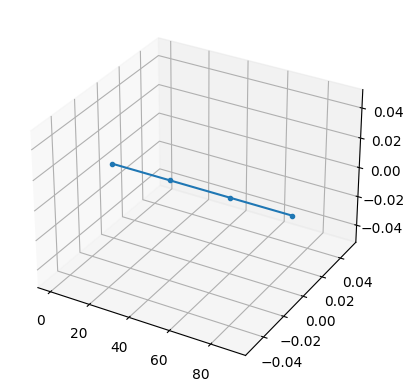

In [8]:
from mpl_toolkits import mplot3d
# z = np.zeros([n,1])
# fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,'.-')
plt.show()